# Laboratorio Aprendizaje automático - Regresión Lineal y Árboles de Decisión

- __Ejemplo de Preparación de datos + Análisis exploratorio de los datos__
- __Explicación de la actividad__

> _The most difficult thing in life is to know yourself - Tales de Mileto_

## Referencias recomendadas
* Hair, J. F., Black, W. C., Babin, B. J., Anderson, R. E., & Tatham, R. L. (1998). Multivariate data analysis (Vol. 5, No. 3, pp. 207-219). Upper Saddle River, NJ: Prentice hall. (Chapter 2)

* Larose, Daniel T., and Chantal D. Larose. Discovering Knowledge in Data : An Introduction to Data Mining, John Wiley & Sons, Incorporated, 2014. ProQuest Ebook Central. (En biblioteca UNIR).

* Larose, Daniel T., and Chantal D. Larose. Data Mining and Predictive Analytics, John Wiley & Sons, Incorporated, 2015. ProQuest Ebook Central. (En biblioteca UNIR).

## Ejemplo de Preparación de datos + Análisis exploratorio de los datos

El Análisis Exploratorio de Datos o en inglés Exploratory Data Analysis (EDA) es un método de análisis de los conjuntos de datos para resumir sus principales características.

El EDA se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar supuestos con ayuda de la estadística y representaciones gráficas.

**¿Qué es?**. Conjunto de técnicas estadísticas dirigidas a explorar, describir y resumir la información que contienen los
datos, maximizando su comprensión.

> Gracias al EDA podemos: 
> - Realizar un análisis descriptivo de los datos.
> - Identificar posibles errores.
> - Revelar la presencia de datos atípicos.
> - Comprobar la relación entre variables.

Preguntas que habitualmente haremos a los datos:
- ¿cuántos son y están todos?
- ¿cuál es el tipo de datos de cada columna?
- ¿existen registros nulos/perdidos/outliers?
- MLsupervised. features vs target
- MLsupervised - clasificación. ¿dataset balanceado?
- ¿qué features parecen ser las más relevantes? (distribución, correlación)

Después de realizar el EDA tenemos más información para abordar mejor la tarea de ML. Incluso para decidir si ML puede resolver la tarea o no.

_Nota: esta tarea puede llevar horas (o algún día)._

**¿Cuáles son los pasos a seguir??**

- Análisis descriptivo.
- Ajuste de tipos de variable.
- Detección y tratamiento de datos ausentes.
- Identificación de datos atípicos.
- Corrrelación de variables.

Datos de ejemplo: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
hourData = pd.read_csv('hour.csv')
hourData.head()

**Primeros pasos**

Conocer el número de filas y columnas para saber si se ha cargado completo el fichero, especialmente delicado en ficheros grandes, o para conocer si hay algún error en alguna linea.


In [ ]:
hourData.shape

In [ ]:
hourData.columns # nombre de las columnas

 Información general del DF, podemos inferir si hay valores nulos.

In [ ]:
hourData.info()

Información estadística sobre el dataset.

Esta función muestra las caracterísitcas estadísticas básicas de cada variable numérica
_number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles._

Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales. Utilizando cuartiles puede evaluar rápidamente la dispersión y la tendencia central de un conjunto de datos.


In [ ]:
hourData.describe()

In [ ]:
#dteday es la fecha, lo toma como categoría, nos indica cuántos hay en cada categoría
hourData['dteday'].value_counts()

**Tomamos decisiones sobre los datos**

Normalizar las variables para que no afecten a aquellos algoritmos que las toman como de mayor importancia por tener valores grandes.

En este dataset se encuentra normalizada la temperatura

**Resumen**

Análisis descriptivo de los datos nos permite :
* localizar errores en nuestro conjunto de datos, 
* detectar valores faltantes en columnas y eliminarlas (e.g: 30% faltantes o más) (o decidir alternativas completar, etc...)
* analizar cómo se comportan las variables (distribuciones, tendencias, dependencias)

In [ ]:
print(hourData['cnt'].describe())

**Preguntas finales**

¿Los datos coinciden con las expectativas? ¿Parece que existe un problema de recopilación de datos? ¿Una clase aparece más frecuente que las otras clases? ¿Hay más valores que faltan o datos no válidos que los que esperaba?

**Análisis exploratorio de los datos (EDA)**




In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt



In [ ]:
# Preparamos una figura de m x n
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2) # M 3rows 2columns
figure.set_size_inches(10, 9) # Tamaño total de la figura

# Distribución de alquileres según las features: season, month, day, hour, workingday

sns.barplot(x='yr', y='cnt', data=hourData, ax=axes[0, 0])
sns.barplot(x='mnth', y='cnt', data=hourData, ax=axes[0, 1])
sns.barplot(x='workingday', y='cnt', data=hourData, ax=axes[1, 0])
sns.barplot(x='hr', y='cnt', data=hourData, ax=axes[1, 1])
sns.barplot(x='season', y='cnt', data=hourData, ax=axes[2,0])

# Titulos
axes[0, 0].set(title='Alquileres year')
axes[0, 1].set(title='Alquileres month')
axes[1, 0].set(title='Alquileres workingday')
axes[1, 1].set(title='Alquileres hour')
axes[2, 0].set(title='Alquileres season')
# axes[2, 1].set(title='Alquileres by second')

# Rotamos 90 grados las etiquetas del eje x de la fila 1
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

In [ ]:
# Creamos una figura de 2x2
figure, axes = plt.subplots(nrows=2, ncols=2) # 2rows 2columns
plt.tight_layout()
figure.set_size_inches(10, 10)

# Step 2 : Creamos los subgráficos
# Gráfico de bigotes de los alquileres por season, weather, holiday, and workingday
sns.boxplot(x='season', y='cnt', data=hourData, ax=axes[0, 0])
sns.boxplot(x='weathersit', y='cnt', data=hourData, ax=axes[0, 1])
sns.boxplot(x='holiday', y='cnt', data=hourData, ax=axes[1, 0])
sns.boxplot(x='workingday', y='cnt', data=hourData, ax=axes[1, 1])

# Step 3: Configuración de los subgráficos
# titulo
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3.2 eliminar que se sobrepongan los titulos
axes[0, 1].tick_params('x', labelrotation=10) # rotate 10 degrees

Los gráficos de caja/bigotes (Box Plots) fueron originalmente desarrollados por M.E. Spear, permiten conocer cómo se distribuyen los datos dentro de una variable. 

A diferencia de los histogramas que requieren un tamaño de muestra de al menos 30 casos para ser útiles, los gráficos de caja pueden ser construidos con tan solo 5 casos y aportan más detalles acerca de las colas de la distribución.

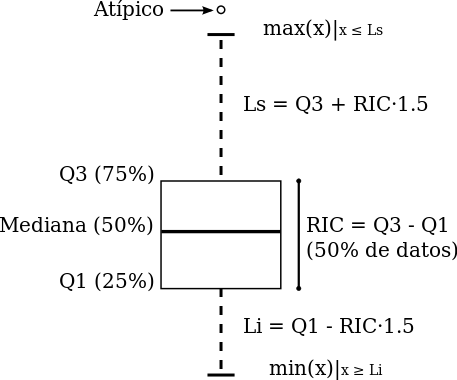

* Mediana. Valor que deja a la mitad de los casos por encima y a la otra mitad por debajo.
* Primer Cuartil (Q1). El 25% de los casos se encuentran por debajo de este valor.
* Tercer Cuartil (Q3). El 75% de los casos se encuentran por encima de este valor.
* Rango Intercuartílico (RIC). Es la diferencia entre el tercer y el primer cuartil.
* Límites Superior o Inferior (Ls o Li). Ls contiene los casos por encima de Q3 más 1,5 veces el rango intercuartílico o Li por debajo de Q1 – 1,5xRIC (Estilo de Tukey). Cuando los valores no son posibles en lugar de emplear la aproximación anterior se escogen los valores máximo o mínimo de la muestra (Estilo de Spears).

Los valores atípicos son aquellos que están más a allá de los límites inferior y superior. Cuando los valores atípicos están más allá de 3 veces el RIC en lugar del 1.5 son denominados valores extremos.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.subplot(421)
hourData['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
hourData['weathersit'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
hourData['hum'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
hourData['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
hourData['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
hourData['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
hourData['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
hourData['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

Podemos hacer algunas inferencias de los datos observando estos histogramas:
* Season tiene cuatro categorías de distribución casi igual
* El clima 1 tiene una mayor contribución, es decir, un clima mayormente despejado.
* Las variables de temperatura, sensación térmica, humedad y velocidad del viento se ven normalmente distribuidas.

In [ ]:
hourData = hourData.drop(columns=['instant', 'dteday', 'casual', 'registered'])
# hourData = hourData.drop(columns=['instant', 'dteday'])

Podríamos analizar muchas más cosas, para entender mejor nuestros datos y conseguir afinar la predicción realizando algunas hipótesis. Por ejemplo:
* Tendencias horarias en el alquiler (datetime variable)
* Influencia del tiempo en el alquiler (extraer buen tiempo y mal tiempo por estaciones y estudiar alquileres)
* Cuándo hay más alquileres por estación
* Las bicicletas se alquilan principalmente para desplazamientos matutinos / vespertinos durante la semana, y sobre todo paseos diurnos los fines de semana.
* Patrones de alquiler entre usuarios registrados y ocasionales.
* Los días laborables, la mayoría de las bicicletas se alquilan en mañanas y noches cálidas.


**Estudio de correlaciones**

Conocer la correlación entre cada variable y la variable objetivo es útil, ya que una correlación alta* implica que existe una relación entre la variable y la variable objetivo. En general, es recomendable incluir variables con una correlación alta porque son las que tienen mayor poder predictivo y omitir variables con una correlación baja porque es probable que sean irrelevantes.

La correlación se encarga de medir la relación entre dos variables, esto no implica necesariamente causalidad pero puede ser útil para predicciones. La correlación significa que dos variables tienen algún tipo de relación detectable, mientras que la causalidad implicaría que una variable influye directamente en la otra.

Hay varios tipos de correlación, la más utilizada es la de Pearson o lineal, seguida por la Spearman y Kendall.

_Coeficiente de correlación de Pearson_

La correlación de Pearson es la más intuitiva y sencilla, debido a esto suele ser la primera opción al medir correlaciones. Calcular el coeficiente de correlación de Pearson nos da un número que puede ir del -1 al 1. El primer valor indica una correlación perfectamente negativa, mientras que el segundo indica una correlación perfectamente positiva. Un valor de 0 por otro lado indicaría una correlación nula.
Decimos entonces que cuanto más cerca esté del 1 o -1 el valor de correlación la relación entre esas dos variables es más fuerte, debilitándose al acercarse al 0.

In [ ]:
# Calcula coeficiente de correlación de Pearson
corr = hourData.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

In [ ]:
# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

**Pregunta final**

¿podemos reducir la dimensionalidad de nuestros datos? ¿qué variables van a ser más relevantes en nuestros modelos?

En este ejemplo podemos eliminar instant y dteday y también casual y registered ya que no aportan información y añaden dependencia a la variable objetivo (c+r = cnt)

In [ ]:
hourData = hourData.drop(columns=['atemp'])


In [ ]:
hourData.shape

In [ ]:
hourData

In [ ]:
X_hourData = hourData.drop(columns=['cnt'])